In [1]:
import scripts.framework as fr
import scripts.headrpp_alg as headrpp

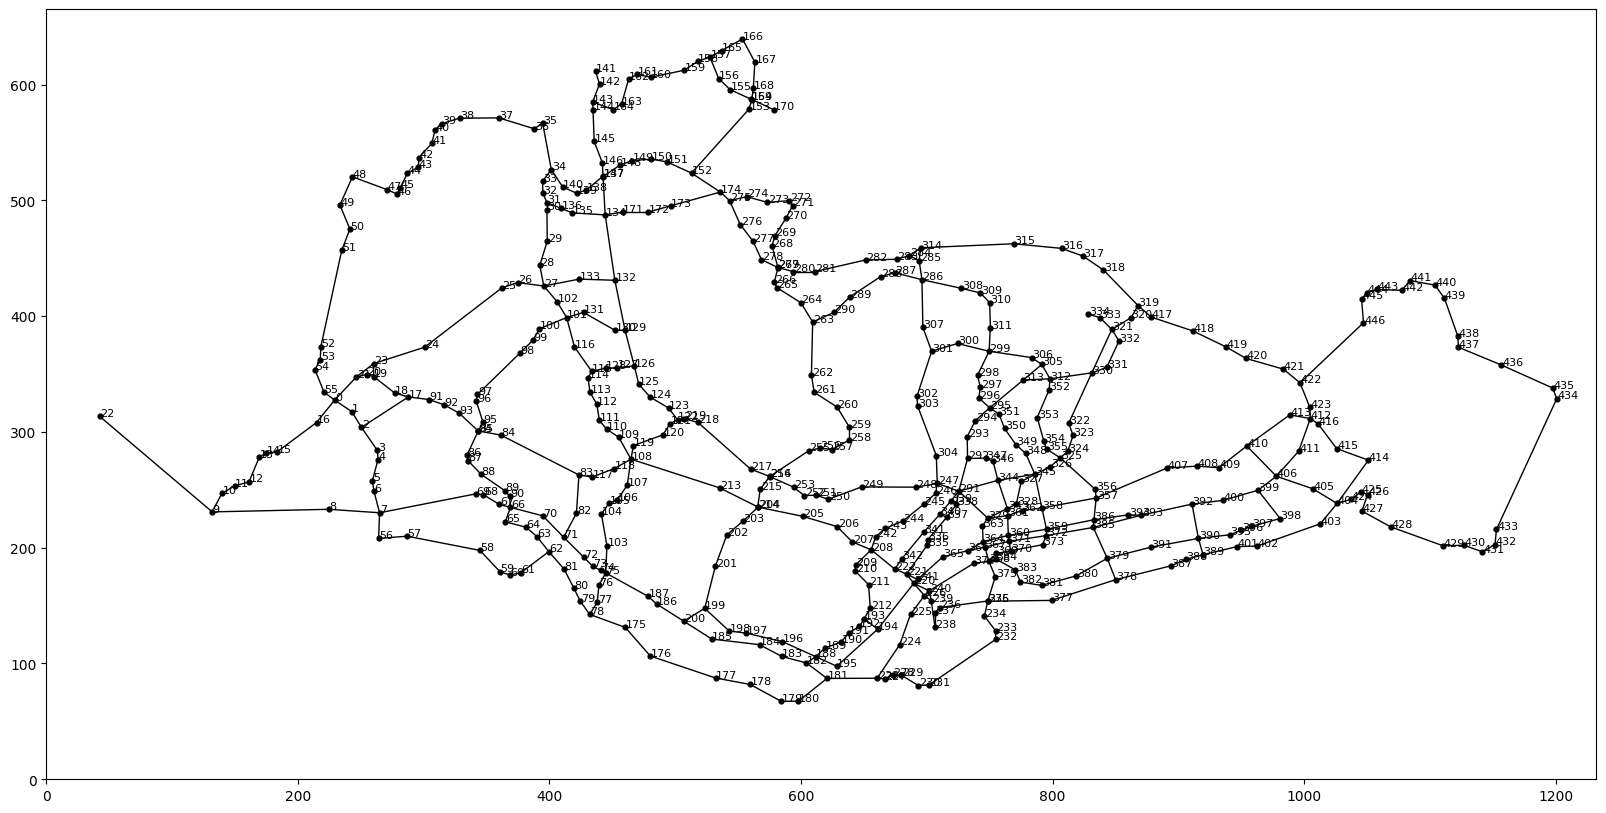

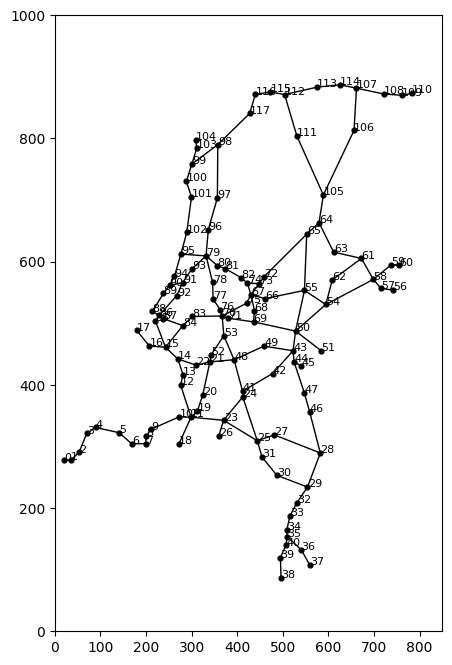

In [2]:
repr_sp = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr_sp.plot_map(plot_nodes=True)

repr_nl = fr.Representation("./data/nodes_nl.csv", "./data/edges_nl.csv", maptype="nl")
repr_nl.plot_map(plot_nodes=True)

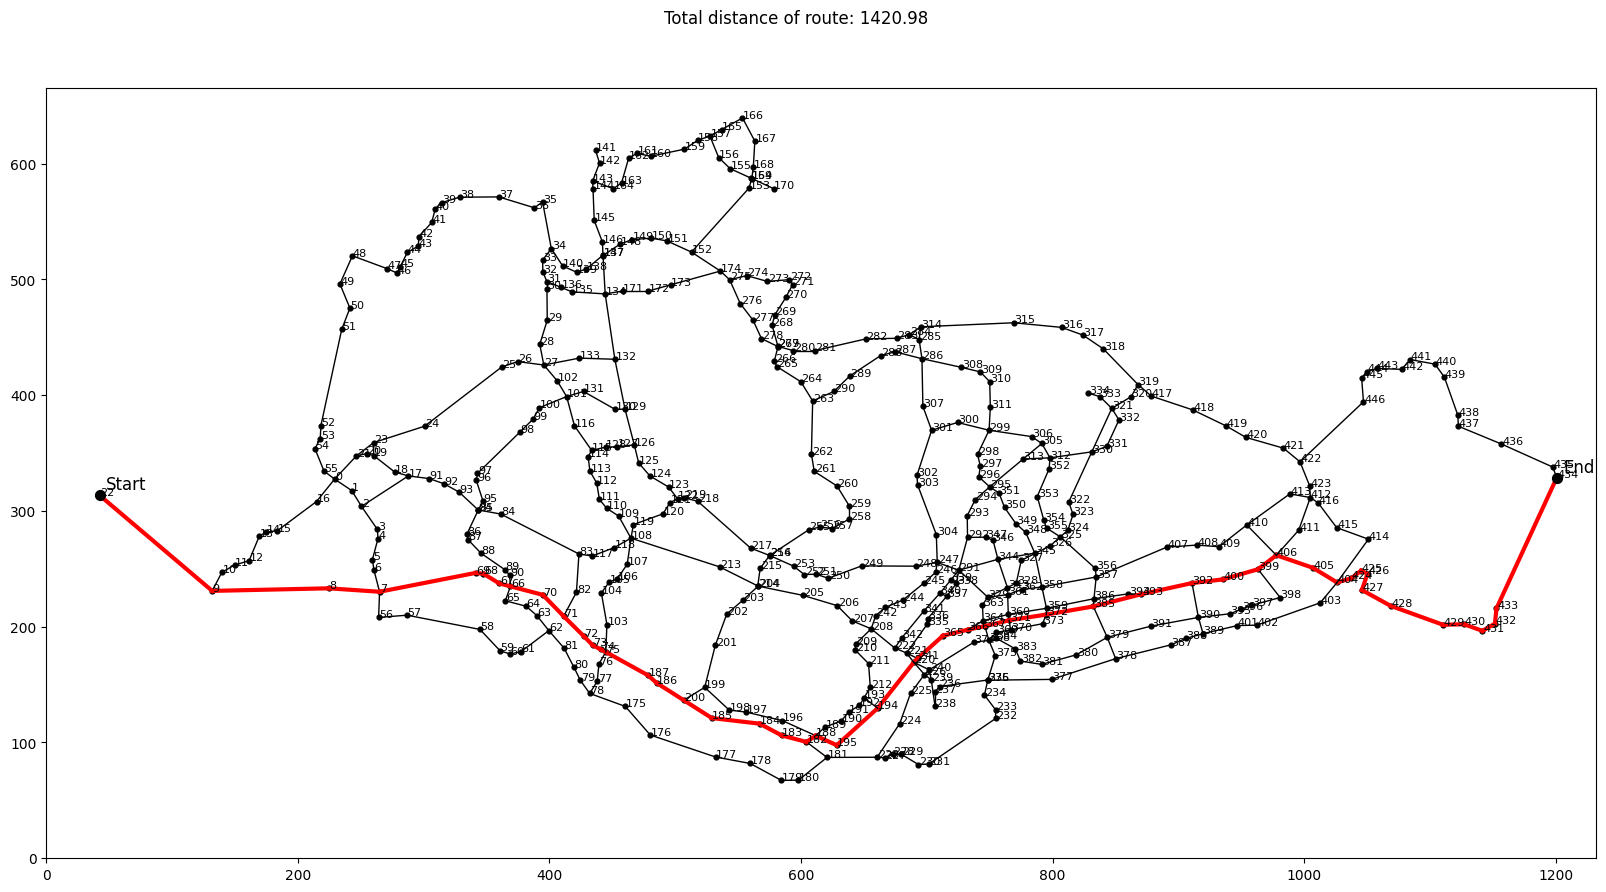

In [3]:
import scripts.dijkstra_alg as dijsktra

alg = dijsktra.DIJKSTRA(repr_sp, 22, 434)
route, cost = alg.run_algorithm(show_results=True)

100%|██████████| 200/200 [00:07<00:00, 25.52it/s]


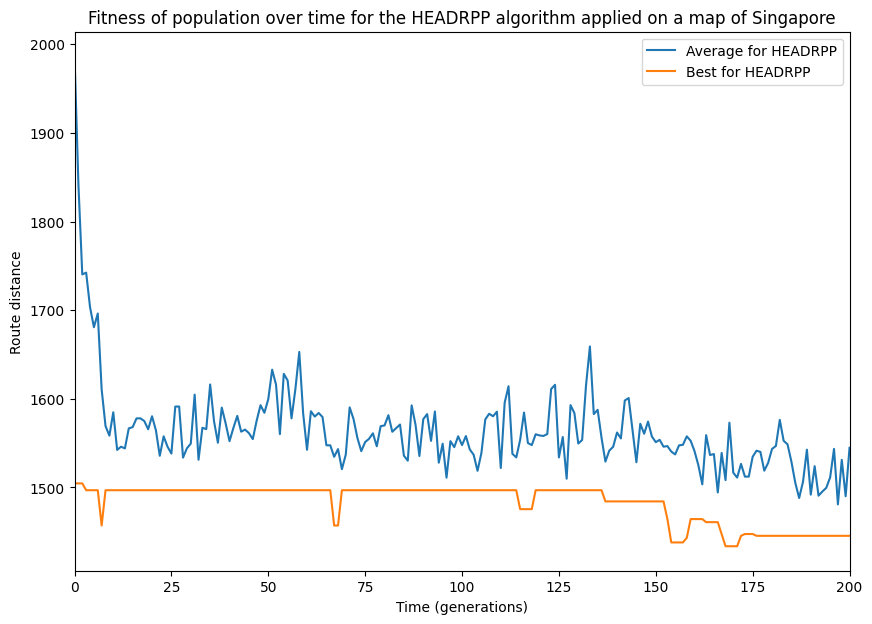

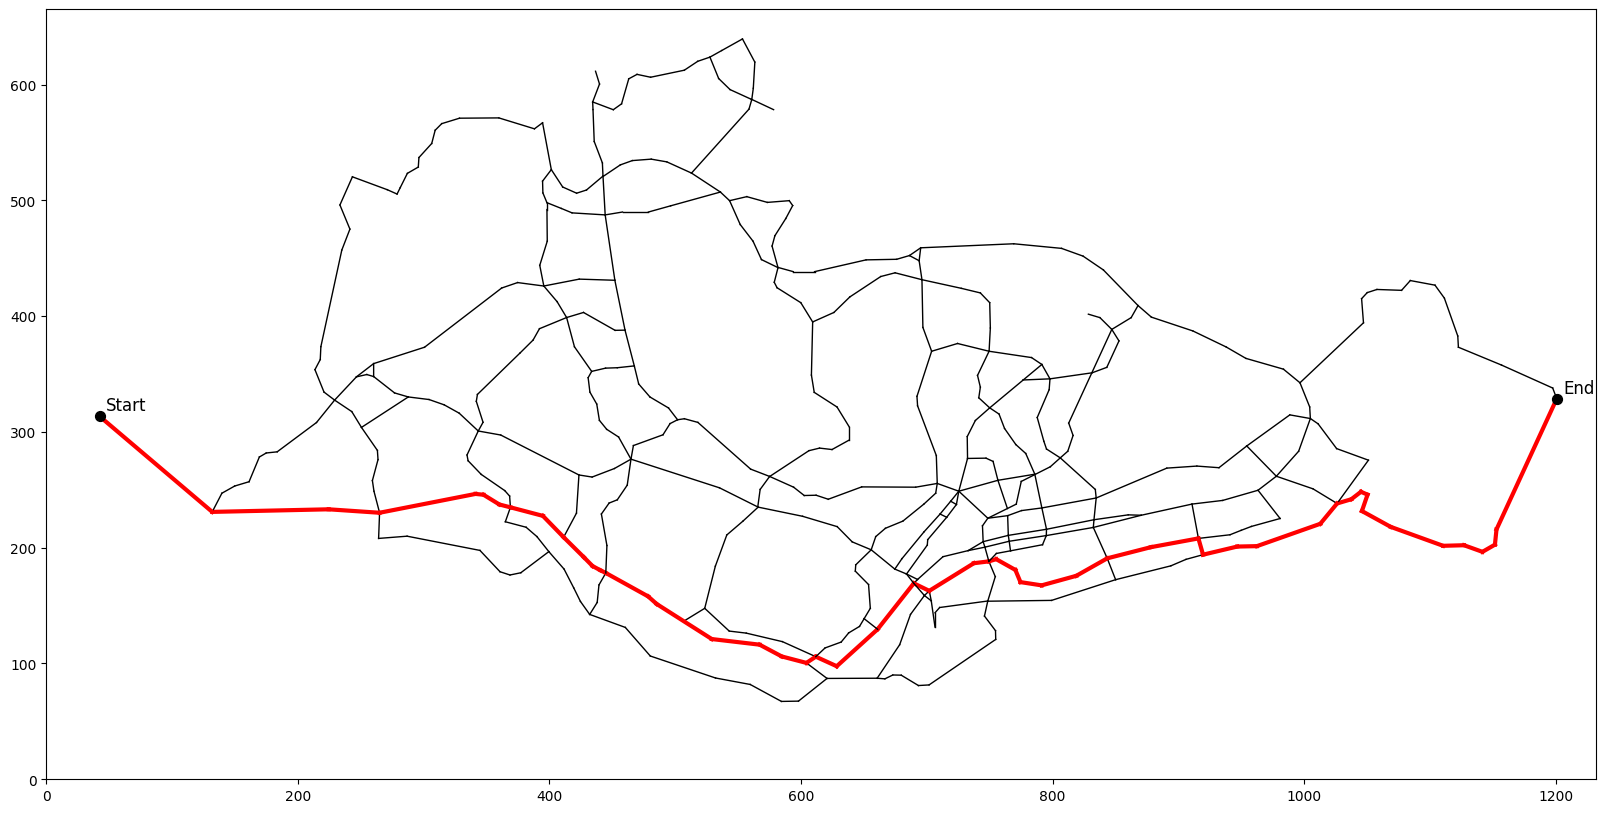

100%|██████████| 200/200 [00:00<00:00, 295.61it/s]


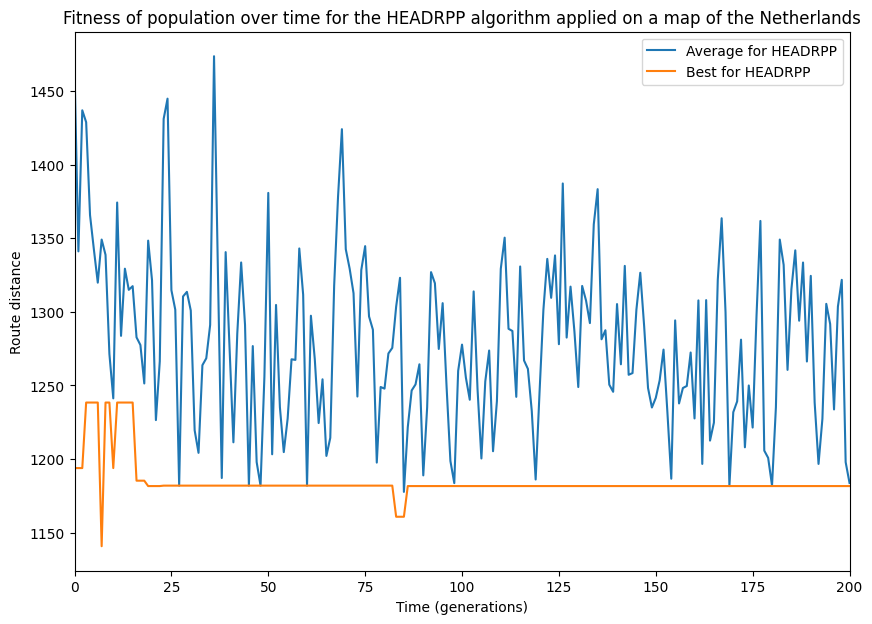

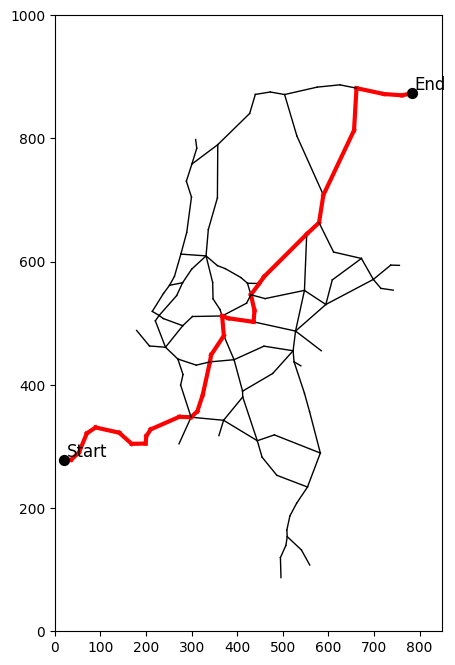

In [4]:
nr_generations = 200

pop_size_sg = 50
alg = headrpp.HEADRPP(repr_sp, nr_generations, 22, 434, pop_size_sg)
routes, avg_fitness, best_fitness = alg.run_algorithm(show_results=True, save_name="images/singapore.png")
repr_sp.plot_map(routes[0], plot_nodes=False)

pop_size_nl = 10
alg = headrpp.HEADRPP(repr_nl, nr_generations, 0, 110, pop_size_nl)
routes, avg_fitness, best_fitness = alg.run_algorithm(show_results=True, save_name="images/netherlands.png")
repr_nl.plot_map(routes[0], plot_nodes=False)